**2nd Assingment "Real textual data convert into embedding using IMDB dataset"**

**Import Libraries**

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score


**Load and Preprocess the IMDB Dataset**



In [ ]:
# Set parameters
max_features = 10000  # Number of most frequent words to consider
maxlen = 500          # Maximum length of sequences
batch_size = 32       # Batch size for training

# Load the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 500), Test shape: (25000, 500)


**Build the LSTM Model**

In [ ]:
# Build the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))

# LSTM layer
model.add(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 388s 620ms/step - accuracy: 0.8777 - loss: 0.3184 - val_accuracy: 0.8430 - val_loss: 0.3738
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 385s 615ms/step - accuracy: 0.9032 - loss: 0.2476 - val_accuracy: 0.8496 - val_loss: 0.4012
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 615ms/step - accuracy: 0.9225 - loss: 0.1981 - val_accuracy: 0.8510 - val_loss: 0.4246
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 444s 617ms/step - accuracy: 0.9353 - loss: 0.1739 - val_accuracy: 0.8362 - val_loss: 0.4543
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 451s 632ms/step - accuracy: 0.9569 - loss: 0.1208 - val_accuracy: 0.8416 - val_loss: 0.4805


**Evaluate the Model**

In [ ]:
# Evaluate on test data
y_pred = (model.predict(x_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 208ms/step
Test Accuracy: 0.84


**Visualize Training Results**

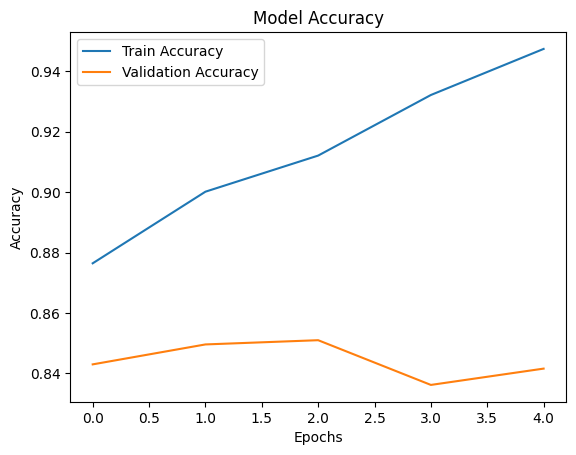

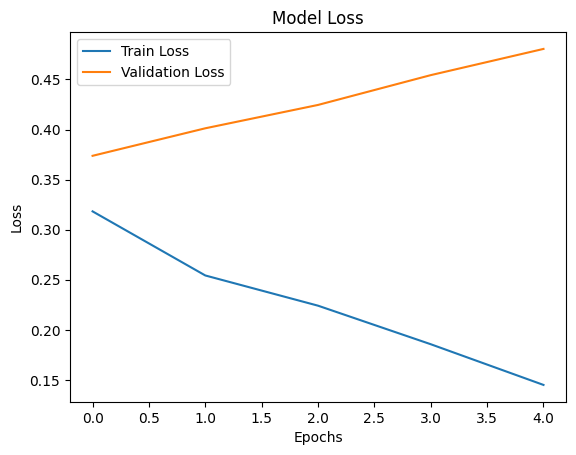

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Save the Model**

In [ ]:
# Save the trained model
model.save("imdb_sentiment_model.h5")
print("Model saved as 'imdb_sentiment_model.h5'")


Model saved as 'imdb_sentiment_model.h5'


In [ ]:
# prompt: save in native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')

import os

# Save the model in the native Keras format
model.save('my_model.keras')
print(f"Model saved to: {os.getcwd()}/my_model.keras")

Model saved to: /content/my_model.keras
